A psychological study has been conducted by a team of students at a University on married couples to determine the cause and effect on their married life and why they tend to have an extra marital affair, they have surveyed and collected a sample of data on which they would like to do further analysis to improve the relationship bond between couple, is it even possible to do so? Using your skills of Machine Learning apply Logistic Regression Model on the data and correctly classify whether a given person will have an affair or not given the set of attributes. 
Convert naffairs column to Discreet Binary before proceeding with algorithm.

**Business Objective :- To predict the status of the affaire of the person**

In [ ]:
#lets laod the required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#lets import the data
affair = pd.read_csv("/content/Affairs.csv")

In [ ]:
affair.columns

Index(['Unnamed: 0', 'naffairs', 'kids', 'vryunhap', 'unhap', 'avgmarr',
       'hapavg', 'vryhap', 'antirel', 'notrel', 'slghtrel', 'smerel', 'vryrel',
       'yrsmarr1', 'yrsmarr2', 'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6'],
      dtype='object')

Unnamed: 0	Index

Naffairs	Number of affairs of a person

kids	Children 

ryunhap	Are you unhappy?

unhap	Unhappy?

avgmarr	Average marriage

hapavg	Average happy

vryhap	Very happy

antirel	Anti real

Notrel	Not real

Slghtrel	Slightly relate

Smerel	Something relate

Vryrel	Very relate

yrsmarr1	Years of marraige

yrsmarr2	Years of marraige

yrsmarr3	Years of marraige

Yrsmarr4	Years of marraige

Yrsmarr5	Years of marraige

Yrsmarr6	Years of marraige


In [ ]:
affair.isna().sum()

Unnamed: 0    0
naffairs      0
kids          0
vryunhap      0
unhap         0
avgmarr       0
hapavg        0
vryhap        0
antirel       0
notrel        0
slghtrel      0
smerel        0
vryrel        0
yrsmarr1      0
yrsmarr2      0
yrsmarr3      0
yrsmarr4      0
yrsmarr5      0
yrsmarr6      0
dtype: int64

In [ ]:
#lets rename the columns
affair1 = affair.rename(columns={'Unnamed: 0':'Unnamed:0'})
#lets remove the not required variables
affair1 = affair1.drop(['Unnamed:0'], axis=1)

In [ ]:
affair1.describe()


,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1.455907,0.715474,0.026622,0.109817,0.154742,0.322795,0.386023,0.079867,0.272879,0.214642,0.316140,0.116473,0.086522,0.146423,0.174709,0.136439,0.116473,0.339434
std,3.298758,0.451564,0.161111,0.312922,0.361960,0.467935,0.487242,0.271313,0.445810,0.410916,0.465355,0.321058,0.281368,0.353824,0.380034,0.343540,0.321058,0.473912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
affair1.head()


,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
affair.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  601 non-null    int64
 1   naffairs    601 non-null    int64
 2   kids        601 non-null    int64
 3   vryunhap    601 non-null    int64
 4   unhap       601 non-null    int64
 5   avgmarr     601 non-null    int64
 6   hapavg      601 non-null    int64
 7   vryhap      601 non-null    int64
 8   antirel     601 non-null    int64
 9   notrel      601 non-null    int64
 10  slghtrel    601 non-null    int64
 11  smerel      601 non-null    int64
 12  vryrel      601 non-null    int64
 13  yrsmarr1    601 non-null    int64
 14  yrsmarr2    601 non-null    int64
 15  yrsmarr3    601 non-null    int64
 16  yrsmarr4    601 non-null    int64
 17  yrsmarr5    601 non-null    int64
 18  yrsmarr6    601 non-null    int64
dtypes: int64(19)
memory usage: 89.3 KB


In [ ]:
affair1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   naffairs  601 non-null    int64
 1   kids      601 non-null    int64
 2   vryunhap  601 non-null    int64
 3   unhap     601 non-null    int64
 4   avgmarr   601 non-null    int64
 5   hapavg    601 non-null    int64
 6   vryhap    601 non-null    int64
 7   antirel   601 non-null    int64
 8   notrel    601 non-null    int64
 9   slghtrel  601 non-null    int64
 10  smerel    601 non-null    int64
 11  vryrel    601 non-null    int64
 12  yrsmarr1  601 non-null    int64
 13  yrsmarr2  601 non-null    int64
 14  yrsmarr3  601 non-null    int64
 15  yrsmarr4  601 non-null    int64
 16  yrsmarr5  601 non-null    int64
 17  yrsmarr6  601 non-null    int64
dtypes: int64(18)
memory usage: 84.6 KB


In [ ]:
affair1.columns


Index(['naffairs', 'kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap',
       'antirel', 'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1',
       'yrsmarr2', 'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6'],
      dtype='object')

In [ ]:
affair1.naffairs.value_counts()

0     451
7      42
12     38
1      34
3      19
2      17
Name: naffairs, dtype: int64

In [ ]:
#lets convert naffairs to binary i.e 0 and 1
#lets use the relace function first
affair1["naffairs"] = affair1["naffairs"].replace(0,"No")
affair1["naffairs"] = affair1["naffairs"].replace(1,"Yes")
affair1["naffairs"] = affair1["naffairs"].replace(2,"Yes")
affair1["naffairs"] = affair1["naffairs"].replace(3,"Yes")
affair1["naffairs"] = affair1["naffairs"].replace(7,"Yes")
affair1["naffairs"] = affair1["naffairs"].replace(12,"Yes")

#lets convert naffairs to binary i.e 0 and 1
affair1['naffairs'] = affair1.naffairs.map({'No':0, 'Yes':1})

In [ ]:
## Model building 
import statsmodels.formula.api as sm
logit_model = sm.logit('naffairs ~ kids+vryunhap+unhap+avgmarr+hapavg+vryhap+antirel+notrel+slghtrel+smerel+vryrel+yrsmarr1+yrsmarr2+yrsmarr3+yrsmarr4+yrsmarr5+yrsmarr6', data = affair1).fit()

Optimization terminated successfully.
         Current function value: 0.501009
         Iterations 7


In [ ]:
#summary
logit_model.summary2() # for AIC

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.108     
Dependent Variable:    naffairs            AIC:                 632.2126  
Date:                  2021-10-29 08:44    BIC:                 698.1915  
No. Observations:      601                 Log-Likelihood:      -301.11   
Df Model:              14                  LL-Null:             -337.69   
Df Residuals:          586                 LLR p-value:         5.1293e-10
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        7.0000                                             
--------------------------------------------------------------------------
           Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
--------------------------------------------------------------------------
Intercept -0.6174 5766969.2629 -0.0000 1.0000 -11303052.6726 11303051.4378
kids       0.1727       0.3110  0.5555 0.5785        -0.4367        0.7822
vryunhap   0.5130          nan     nan    nan            nan           nan
unhap      0.6187          nan     nan    nan            nan           nan
avgmarr   -0.2178          nan     nan    nan            nan           nan
hapavg    -0.5264          nan     nan    nan            nan           nan
vryhap    -1.0049          nan     nan    nan            nan           nan
antirel    0.7815          nan     nan    nan            nan           nan
notrel    -0.2052          nan     nan    nan            nan           nan
slghtrel   0.1848          nan     nan    nan            nan           nan
smerel    -0.7377          nan     nan    nan            nan           nan
vryrel    -0.6408          nan     nan    nan            nan           nan
yrsmarr1  -0.8579 8277203.2242 -0.0000 1.0000 -16223021.0700 16223019.3541
yrsmarr2  -0.5608 8277203.2242 -0.0000 1.0000 -16223020.7729 16223019.6513
yrsmarr3   0.0635 8277203.2242  0.0000 1.0000 -16223020.1485 16223020.2756
yrsmarr4   0.0891 8277203.2242  0.0000 1.0000 -16223020.1230 16223020.3012
yrsmarr5   0.4088 8277203.2242  0.0000 1.0000 -16223019.8033 16223020.6209
yrsmarr6   0.2399 8277203.2242  0.0000 1.0000 -16223019.9722 16223020.4519
==========================================================================

"""

In [ ]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               naffairs   No. Observations:                  601
Model:                          Logit   Df Residuals:                      586
Method:                           MLE   Df Model:                           14
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                  0.1083
Time:                        08:45:08   Log-Likelihood:                -301.11
converged:                       True   LL-Null:                       -337.69
Covariance Type:            nonrobust   LLR p-value:                 5.129e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6174   5.77e+06  -1.07e-07      1.000   -1.13e+07    1.13e+07
kids           0.1727      0.311      0.556      0.579      -0.437       0.782
vryunhap       0.5130        nan        nan        nan         nan         nan
unhap          0.6187        nan        nan        nan         nan         nan
avgmarr       -0.2178        nan        nan        nan         nan         nan
hapavg        -0.5264        nan        nan        nan         nan         nan
vryhap        -1.0049        nan        nan        nan         nan         nan
antirel        0.7815        nan        nan        nan         nan         nan
notrel        -0.2052        nan        nan        nan         nan         nan
slghtrel       0.1848        nan        nan        nan         nan         nan
smerel        -0.7377        nan        nan        nan         nan         nan
vryrel        -0.6408        nan        nan        nan         nan         nan
yrsmarr1      -0.8579   8.28e+06  -1.04e-07      1.000   -1.62e+07    1.62e+07
yrsmarr2      -0.5608   8.28e+06  -6.78e-08      1.000   -1.62e+07    1.62e+07
yrsmarr3       0.0635   8.28e+06   7.68e-09      1.000   -1.62e+07    1.62e+07
yrsmarr4       0.0891   8.28e+06   1.08e-08      1.000   -1.62e+07    1.62e+07
yrsmarr5       0.4088   8.28e+06   4.94e-08      1.000   -1.62e+07    1.62e+07
yrsmarr6       0.2399   8.28e+06    2.9e-08      1.000   -1.62e+07    1.62e+07
==============================================================================
"""

In [ ]:
pred = logit_model.predict(affair1.iloc[ :, 0: ])

In [ ]:
#ROC
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(affair1.naffairs, pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2521571570135329

In [ ]:
import pylab as pl

i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
61,0.312639,0.673333,0.687361,-0.014028,0.24517


[]

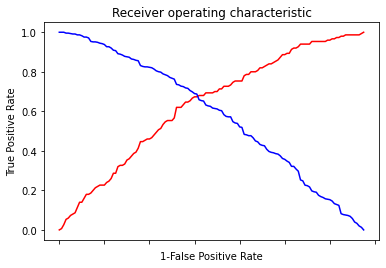

In [ ]:
fig, ax = pl.subplots()
pl.plot(roc['tpr'], color = 'red')
pl.plot(roc['1-fpr'], color = 'blue')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [ ]:
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.720880


In [ ]:
# filling all the cells with zeroes
affair1["pred"] = np.zeros(601)
# taking threshold value and above the prob value will be treated as correct value 
affair1.loc[pred > optimal_threshold, "pred"] = 1


In [ ]:
# classification report
classification = classification_report(affair1["pred"], affair1["naffairs"])
classification

'              precision    recall  f1-score   support\n\n         0.0       0.71      0.86      0.77       370\n         1.0       0.65      0.42      0.51       231\n\n    accuracy                           0.69       601\n   macro avg       0.68      0.64      0.64       601\nweighted avg       0.69      0.69      0.67       601\n'

In [ ]:
# Splitting the data into train and test data 
# from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(affair1, test_size = 0.3)

In [ ]:
# Model building 
import statsmodels.formula.api as sm
model = sm.logit('naffairs ~ kids+vryunhap+unhap+avgmarr+hapavg+vryhap+antirel+notrel+slghtrel+smerel+vryrel+yrsmarr1+yrsmarr2+yrsmarr3+yrsmarr4+yrsmarr5+yrsmarr6', data = train_data).fit()


Optimization terminated successfully.
         Current function value: 0.482717
         Iterations 6


In [ ]:
#summary
model.summary2() # for AIC

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.116     
Dependent Variable:    naffairs            AIC:                 435.4821  
Date:                  2021-10-29 08:47    BIC:                 496.0859  
No. Observations:      420                 Log-Likelihood:      -202.74   
Df Model:              14                  LL-Null:             -229.36   
Df Residuals:          405                 LLR p-value:         1.7365e-06
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
           Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
--------------------------------------------------------------------------
Intercept -0.6521          nan     nan    nan            nan           nan
kids       0.2033       0.3624  0.5610 0.5748        -0.5070        0.9136
vryunhap   0.3818          nan     nan    nan            nan           nan
unhap      0.7475          nan     nan    nan            nan           nan
avgmarr   -0.2368          nan     nan    nan            nan           nan
hapavg    -0.5448          nan     nan    nan            nan           nan
vryhap    -0.9998          nan     nan    nan            nan           nan
antirel    0.8776 6253236.1055  0.0000 1.0000 -12256116.6759 12256118.4311
notrel    -0.1617 6253236.1055 -0.0000 1.0000 -12256117.7152 12256117.3918
slghtrel   0.2388 6253236.1055  0.0000 1.0000 -12256117.3148 12256117.7923
smerel    -0.8323 6253236.1055 -0.0000 1.0000 -12256118.3858 12256116.7213
vryrel    -0.7745 6253236.1055 -0.0000 1.0000 -12256118.3280 12256116.7790
yrsmarr1  -0.4883          nan     nan    nan            nan           nan
yrsmarr2  -0.5445          nan     nan    nan            nan           nan
yrsmarr3   0.2188          nan     nan    nan            nan           nan
yrsmarr4  -0.3710          nan     nan    nan            nan           nan
yrsmarr5   0.3550          nan     nan    nan            nan           nan
yrsmarr6   0.1780          nan     nan    nan            nan           nan
==========================================================================

"""

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               naffairs   No. Observations:                  420
Model:                          Logit   Df Residuals:                      405
Method:                           MLE   Df Model:                           14
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                  0.1160
Time:                        08:47:55   Log-Likelihood:                -202.74
converged:                       True   LL-Null:                       -229.36
Covariance Type:            nonrobust   LLR p-value:                 1.736e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6521        nan        nan        nan         nan         nan
kids           0.2033      0.362      0.561      0.575      -0.507       0.914
vryunhap       0.3818        nan        nan        nan         nan         nan
unhap          0.7475        nan        nan        nan         nan         nan
avgmarr       -0.2368        nan        nan        nan         nan         nan
hapavg        -0.5448        nan        nan        nan         nan         nan
vryhap        -0.9998        nan        nan        nan         nan         nan
antirel        0.8776   6.25e+06    1.4e-07      1.000   -1.23e+07    1.23e+07
notrel        -0.1617   6.25e+06  -2.59e-08      1.000   -1.23e+07    1.23e+07
slghtrel       0.2388   6.25e+06   3.82e-08      1.000   -1.23e+07    1.23e+07
smerel        -0.8323   6.25e+06  -1.33e-07      1.000   -1.23e+07    1.23e+07
vryrel        -0.7745   6.25e+06  -1.24e-07      1.000   -1.23e+07    1.23e+07
yrsmarr1      -0.4883        nan        nan        nan         nan         nan
yrsmarr2      -0.5445        nan        nan        nan         nan         nan
yrsmarr3       0.2188        nan        nan        nan         nan         nan
yrsmarr4      -0.3710        nan        nan        nan         nan         nan
yrsmarr5       0.3550        nan        nan        nan         nan         nan
yrsmarr6       0.1780        nan        nan        nan         nan         nan
==============================================================================
"""

In [ ]:
# Prediction on Test data set
test_pred = logit_model.predict(test_data)

In [ ]:
# Creating new column for storing predicted class of Attorney
# filling all the cells with zeroes
test_data["test_pred"] = np.zeros(181)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# taking threshold value as 'optimal_threshold' and above the thresold prob value will be treated as 1 
test_data.loc[test_pred > optimal_threshold, "test_pred"] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
# confusion matrix 
confusion_matrix = pd.crosstab(test_data.test_pred, test_data['naffairs'])
confusion_matrix


naffairs,0,1
test_pred,,
0.0,88,16
1.0,42,35


In [ ]:
accuracy_test = (88 + 35)/(181) 
accuracy_test

0.6795580110497238

In [ ]:
# classification report
classification_test = classification_report(test_data["test_pred"], test_data["naffairs"])
classification_test

'              precision    recall  f1-score   support\n\n         0.0       0.68      0.85      0.75       104\n         1.0       0.69      0.45      0.55        77\n\n    accuracy                           0.68       181\n   macro avg       0.68      0.65      0.65       181\nweighted avg       0.68      0.68      0.66       181\n'

In [ ]:
#ROC CURVE AND AUC
fpr, tpr, threshold = metrics.roc_curve(test_data["naffairs"], test_pred)

Text(0, 0.5, 'True positive rate')

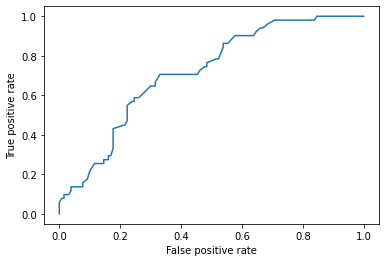

In [ ]:
#PLOT OF ROC
plt.plot(fpr, tpr);plt.xlabel("False positive rate");plt.ylabel("True positive rate")

In [ ]:
roc_auc_test = metrics.auc(fpr, tpr)
roc_auc_test

0.7162141779788838

In [ ]:
# prediction on train data
train_pred = model.predict(train_data.iloc[ :, 1: ])

In [ ]:
# Creating new column 
# filling all the cells with zeroes
train_data["train_pred"] = np.zeros(420)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# taking threshold value and above the prob value will be treated as correct value 
train_data.loc[train_pred > optimal_threshold, "train_pred"] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
# confusion matrix
confusion_matrx = pd.crosstab(train_data.train_pred, train_data['naffairs'])
confusion_matrx



naffairs,0,1
train_pred,,
0.0,229,35
1.0,92,64


In [ ]:
accuracy_train = (229 + 64)/(420)
print(accuracy_train)

0.6976190476190476


**Accuracy = 69.76%**